<h1><strong>Jonathan Revoir - Project 2</strong></h1>

<h2><strong>Introduction</strong></h2>
Since the year 1950, heart disease has been the leading cause of death around the world, accounting for 31% of all deaths worldwide. With a myriad of factors that lead to this disease, it can be very difficult to predict it until it is too late. <br>
My goal with this project is to look at the different causing factors of heart disease including chest pain, blood pressure, heart sugar, and cholesterol to create a model that can predict if someone will have contract heart disease or not

<h2><strong>Data Introduction</strong></h2>
The Dataset that I will be using is called "Heart Failure Prediction Dataset" on <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Kaggle</a>. This dataset contains 900 observations from patients across America and has 12 attributes: Age, Sex, Chest pain yype, Resting BP, Cholesterol, Fasting blood sugar, Resting ECG, Max heart rate, Exercise induced angina, Old peak, ST slope, and Heart disease. My goal is to look at the attributes: Age, Resting BP, Cholesterol, and Resting ECG to see if there is any correlation between those and Heart disease, and then try to predict heart disease based on those 3 attributes.

In [ ]:
# Imports
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [88]:
df = pd.read_csv('data/heart.csv')

<h2>Pre-Processing</h2>
For Pre-processing, I will first be taking out any null values. Then, the dataset specifies that there are 1200 observations with 270 duplicated observations, In order to not skew the results, I will be taking out all of these duplicated rows. <br>
I am also going to set up the training and testing sets to be used by my classification model later.
During my inital visualizations, I noticed that there were a set of rows that had a value of 0 for Cholesterol or RestingBP, which leads me to beliveve that these were null values that were set to 0, and I will be removing them from my model.

In [ ]:
df = df[['Age', 'RestingBP', 'Cholesterol', 'RestingECG','HeartDisease']]
df = df.dropna()
df = df.drop_duplicates()
df = df[(df['Age'] != 0) & (df['RestingBP'] != 0) & (df['Cholesterol'] != 0) & (df['RestingECG'] != 0)]


categorical_features = ['RestingECG']
numerical_features = ['Age','RestingBP', 'Cholesterol']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2>Data Visualizations</h2>

Before working with my model, I want to understand my data better, which is why I have created a list of visualizations for the different types of data in this set.

The first two distributions are the distributions of resting blood pressure and cholesterol, where we can see that they have averages of around 130 and 225 respectively, with both having a skewed right distribution.

Text(0.5, 1.0, 'Distribution of RestingBP')

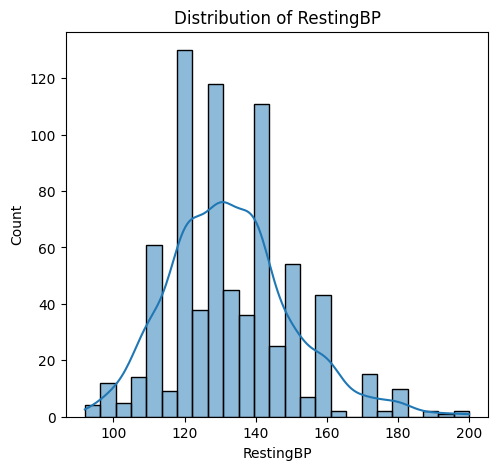

In [102]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['RestingBP'], kde=True)
plt.title('Distribution of RestingBP')

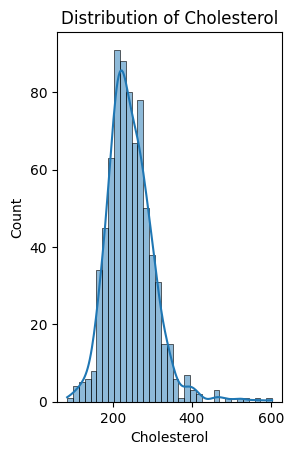

In [103]:
plt.subplot(1, 2, 2)
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Distribution of Cholesterol')
plt.show()

The next visualization is a box plot of the Resting ECG of the patients tested, with the majority having normal resting ECGs compared to ST or LVH. 

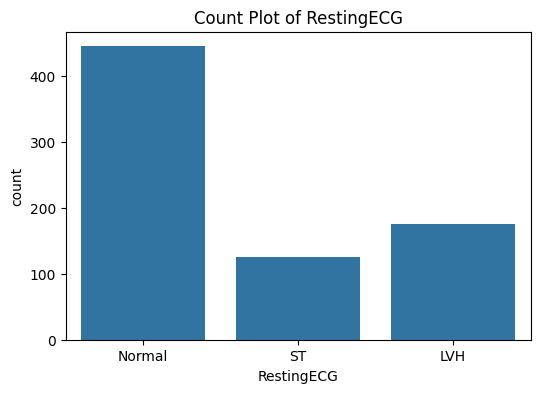

In [104]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RestingECG', data=df)
plt.title('Count Plot of RestingECG')
plt.show()

Finally, I wanted to look at the correlation between each of the variables in my data set. As we can see, the highest correlations are between Age and Resting BP and Age and Heart Disease. The next highest after those is between Resting BP and Heart Disease, which leads me to believe that these three attributes are the major contributing factors to heart disease in people.

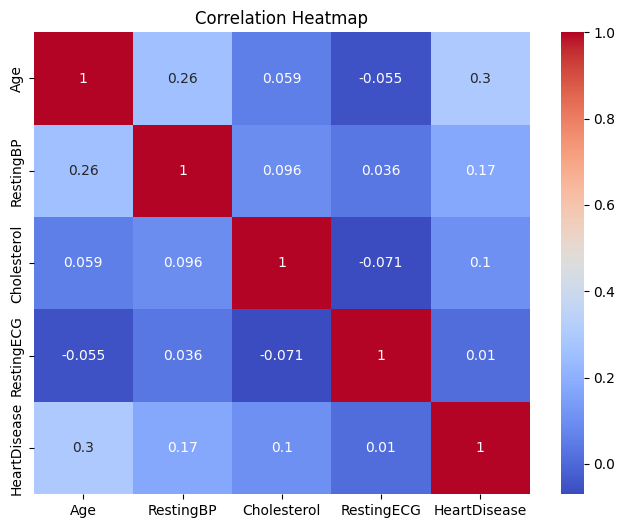

In [107]:
df_numeric = df.copy()
df_numeric['RestingECG'] = df_numeric['RestingECG'].astype('category').cat.codes

plt.figure(figsize=(8, 6))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h2>Modeling</h2>
For my modeling, I decided to try out a list of models including: RandomForestClassifier, LogisticRegression, KNN, NaiveBayes, and DecisionTree. I decided to try out a list of models to see if there were any that were more effective at solving this problem than the others. <br>
Random Forest Classifier uses multiple decision trees to make predictions about the individual trees, it is a good model to use to get a high level of accuracy; however it does use the most processing power of all the models. <br>
Logistic Regression uses binary classification to estimate probabilities of target variables. I chose this model because it is good for simple datasets, like the one I have. <br>
K-Nearest Neighbors classifies data based on the other data around it. It is a good model to use if the dataset is all very similar, and runs into issues if the data is too noisy or if there are too many outliers. <br>
Naive Bayes predicts probabilities using Bayes Theorem. It is good with categorical data, like the RestingECG data I have, but because it assumes that all of the data is independent, I believe it will have some issues with my dataset. <br>
Decision Tree splits data into different subsets based on the value of the attributes, it is easy to track on smaller trees, but runs into issues with overfitting on larger trees.

In [108]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{model_name} Model")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

RandomForest Model
Accuracy: 0.6442953020134228


LogisticRegression Model
Accuracy: 0.6845637583892618


KNN Model
Accuracy: 0.6375838926174496


NaiveBayes Model
Accuracy: 0.6174496644295302


DecisionTree Model
Accuracy: 0.5973154362416108




<h2>Evaluation</h2>
Sadly, none of my models performed as accurately as I would've hoped. Each of my models had a very similar accuracy score, ranging from 0.59-0.68. With my data being very simple, I am not surprised that the Logistic Regression model was the highest. <br>
I tried to change the hyperparameters that I was using, as well as changing which attributes I was focusing on, but I was still getting roughly the same accuracy.

<h2>Impact</h2>
Being the leading cause of death around the world, heart disease is a very important issue that needs to be solved, and I think that creating a classification model that can accurately estimate if someone is at risk of having heart disease, that would be very beneficial. Ultimately, a healthcare specialist should be there to see if the estimation is accurate and check that there aren't false negatives, but this could be used to help them to make a note of which patients to take a more in-depth look at.

<h2>References</h2>
<a href="https://github.com/Jonrevoir/ITCS3162/tree/381fca2f10d508c8d0366dc124d95e108e172fd0/Project2">You can find my Jupyter Notebook here</a> <br><br>
<a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Dataset</a>